# **PRE-PROCESSING WITH SKLEARN**

Data preprocessing is a crucial step in the machine learning pipeline that involves transforming raw data into a format suitable for modeling. 

It encompasses various techniques such as handling missing values, encoding categorical features, scaling numerical data, and more. Effective preprocessing ensures that the data is clean, consistent, and in a form that machine learning algorithms can understand and leverage for accurate predictions. 

In this notebook, we will explore various preprocessing techniques using the scikit-learn library, a powerful and widely-used tool in the Python ecosystem for machine learning.

We will go through each technique one-by-one and then we will apply all these techniques to our data to see the results of our model.

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error


# **1. Standardization**
- The data that we use in our models contains multiple featrues of various dimensions and scales.

- Different scales of the data features affect the modeling of a dataset adversely.

- It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. Thus, it is necessary to Scale the data prior to modeling.

That is when standardization comes into picture.

#### ***Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:***

#### ***mean - 0(zero)***

#### ***standard deviation - 1***

Python sklearn library offers us with StandardScaler() function to standardize the data values into a standard format.

Let's transform our data using a Standard Scaler form scikit learn.

In [3]:
# Create a DataFrame with features and target
df = pd.read_csv('/kaggle/input/wine-types/wine_types.csv')
df= df[['Type','Alcohol', 'Proline']]
df['Proline'] = df['Proline'] * 100
df.head() 

,Type,Alcohol,Proline
0,1,14.23,106500
1,1,13.20,105000
2,1,13.16,118500
3,1,14.37,148000
4,1,13.24,73500


In [4]:
# set feature and target columns
X = df.drop(columns = ['Type'])
y = df['Type']

### **Apply Standard Scaler**
Now we will apply standard scaler to our data using sklearn.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the feature set, it will learn parameters
scaler.fit(X)

# transform feature sets
X_scaled = scaler.transform(X)

In [6]:
X

,Alcohol,Proline
0,14.23,106500
1,13.20,105000
2,13.16,118500
3,14.37,148000
4,13.24,73500
...,...,...
173,13.71,74000
174,13.40,75000
175,13.27,83500
176,13.17,84000


In [7]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Alcohol,Proline
0,1.518613,1.013009
1,0.246290,0.965242
2,0.196879,1.395148
3,1.691550,2.334574
4,0.295700,-0.037874
...,...,...
173,0.876275,-0.021952
174,0.493343,0.009893
175,0.332758,0.280575
176,0.209232,0.296498


In [8]:
np.round(X.describe(), 1)

,Alcohol,Proline
count,178.0,178.0
mean,13.0,74689.3
std,0.8,31490.7
min,11.0,27800.0
25%,12.4,50050.0
50%,13.0,67350.0
75%,13.7,98500.0
max,14.8,168000.0


In [9]:
np.round(X_scaled.describe(), 1)

,Alcohol,Proline
count,178.0,178.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.4,-1.5
25%,-0.8,-0.8
50%,0.1,-0.2
75%,0.8,0.8
max,2.3,3.0


Now we can see that we have scaled our data with mean = 0 and std as 1. Now let's visualize our data to see the effect of scaling on our data.

## **Effect of Scaling**
First le's create a simple scatter plot of Age vs. Estimated Salary for both scaled data and un-scaled data.

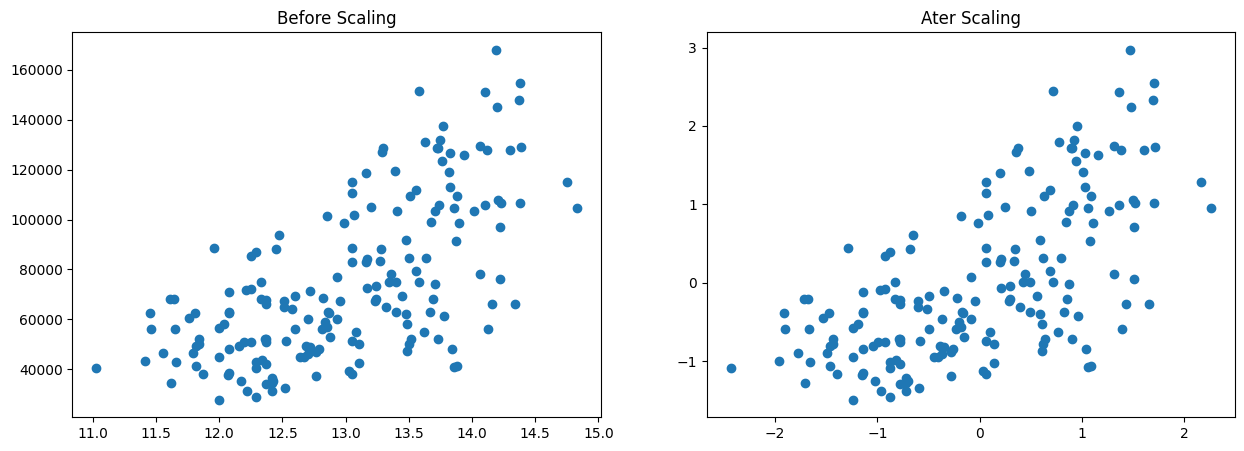

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

ax1.scatter(X['Alcohol'], X['Proline'])
ax1.set_title('Before Scaling')
ax2.scatter(X_scaled['Alcohol'], X_scaled['Proline'])
ax2.set_title('Ater Scaling')
plt.show()

From the above plot we can clearly see that the shape of our data has not changed only the center point is shifted, now we have a mean Alcohol value of 0 and the y axis has now been contered at one. That's what standardization do it changes the range of values while preserving their original shape.

Now if we want to see the distribution of our data before and after scaling we can create a kde plot to see the distribution of our data.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

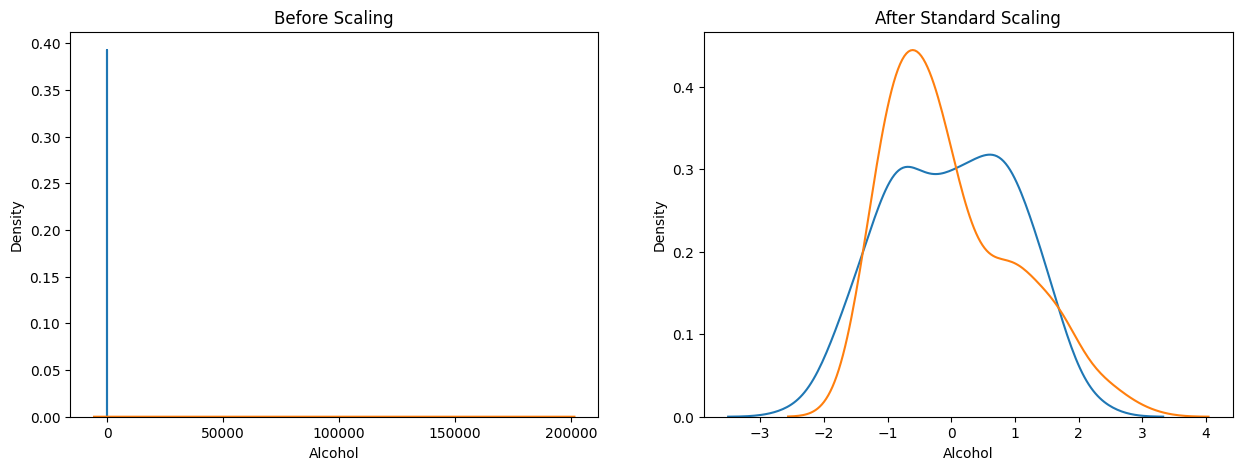

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X['Alcohol'], ax=ax1)
sns.kdeplot(X['Proline'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_scaled['Proline'], ax=ax2)
plt.show()

## **Comparing Model Performance on Original and Scaled Data**

In [12]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)


In [13]:
model = LogisticRegression()
model_scaled = LogisticRegression()

In [14]:
# Fit both models
model.fit(X_train, y_train)
model_scaled.fit(X_train_scaled, y_train_scaled)

LogisticRegression()

In [15]:
y_pred = model.predict(X_test)
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [16]:
print("Original Data",accuracy_score(y_test,y_pred))
print("Scaled Data",accuracy_score(y_test_scaled,y_pred_scaled))

Original Data 0.6944444444444444
Scaled Data 0.9444444444444444


From the above output we can clearly see that the mdoel perforamnce has significantly increased after scaling our data. 

This shows that data scaling is really important for improving our model performance.

# **2. Normalization**
Normalization refers to scaling the features of your data to a specific range or distribution. This is often done to ensure that the features contribute equally to the model, especially for algorithms that are sensitive to the scale of the input features, such as gradient descent-based models, k-nearest neighbors, and many others.

There are several normalization techniques available in scikit-learn. Here we will use Min Max Scaler and Robust Scaler and see how they affect our data.

For demonstration I am adding some outliers to the data to get an idea which normaliztion techniques are more robust for outliers.

In [17]:
# New DataFrame to append
new_data = pd.DataFrame({'Alcohol': [20, 25, 30],
                          'Proline': [40000, 35000, 20000],
                          'Type': [0, 1, 1]})

# Concatenating the DataFrames
df = pd.concat([df, new_data], ignore_index=True)
df.head()


,Type,Alcohol,Proline
0,1,14.23,106500
1,1,13.20,105000
2,1,13.16,118500
3,1,14.37,148000
4,1,13.24,73500


In [18]:
# set feature and target columns
X = df.drop(columns = ['Type'])
y = df['Type']


### **Min-Max Scaler**
- MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. 
- It scales the values to a specific value range without changing the shape of the original distribution.

We can use Min Max Scaler from sklearn to scale our data from 0 t0 1 by default or if we wat scaling on some other range we can specify it also.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the feature set, it will learn parameters
scaler.fit(X)

# transform feature sets
X_scaled = scaler.transform(X)

In [20]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Alcohol,Proline
0,0.168687,0.584459
1,0.114391,0.574324
2,0.112283,0.665541
3,0.176067,0.864865
4,0.116500,0.361486
...,...,...
176,0.112810,0.432432
177,0.163416,0.243243
178,0.472852,0.135135
179,0.736426,0.101351


## **Effect of MinMax Scaler**

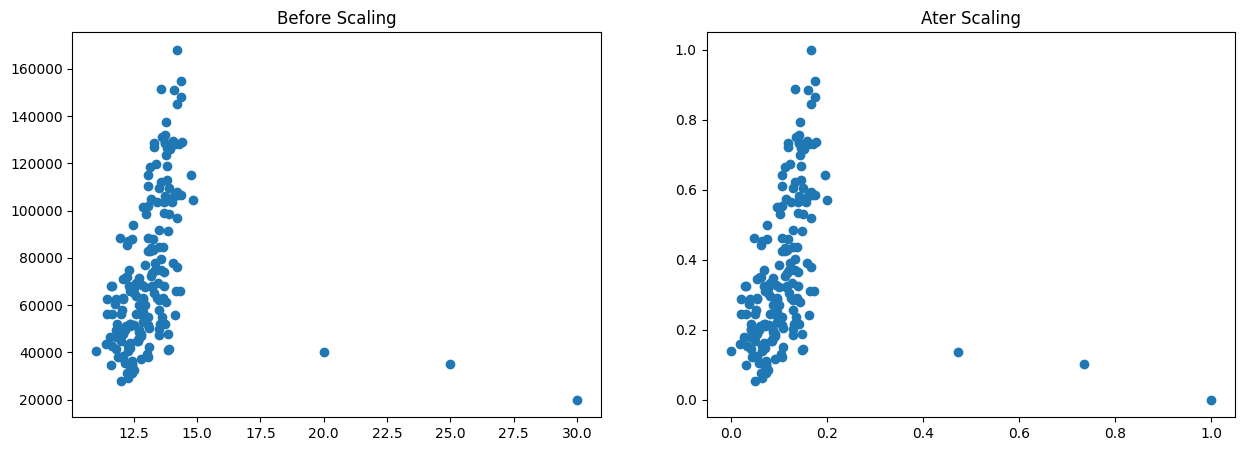

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

ax1.scatter(X['Alcohol'], X['Proline'])
ax1.set_title('Before Scaling')
ax2.scatter(X_scaled['Alcohol'], X_scaled['Proline'])
ax2.set_title('Ater Scaling')
plt.show()

From te above plot we can see that the shape of data has not been changed also the outliers are as it is on the scaled data , also the range of values has now been changed to [0, 1]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

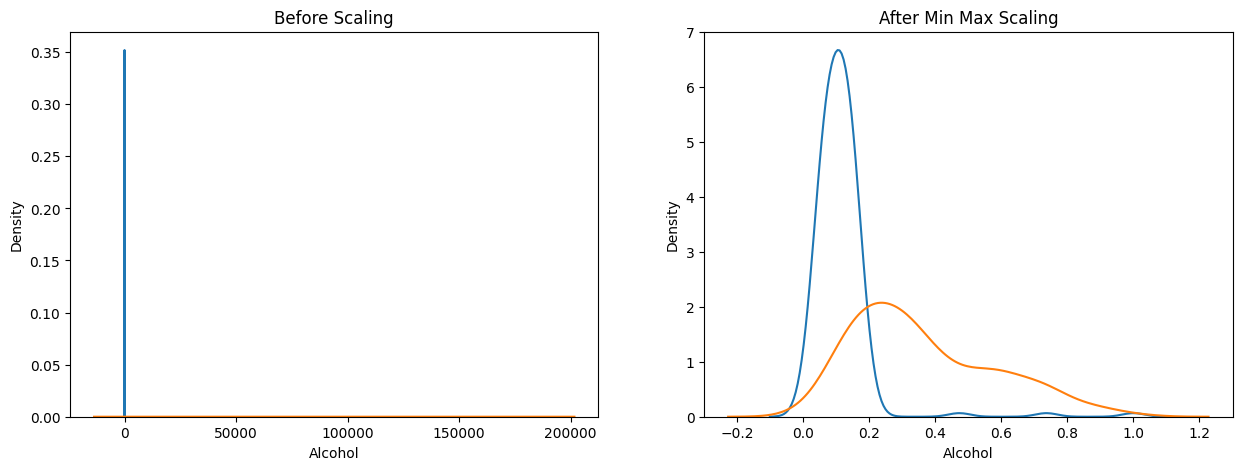

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X['Alcohol'], ax=ax1)
sns.kdeplot(X['Proline'], ax=ax1)

# after scaling
ax2.set_title('After Min Max Scaling')
sns.kdeplot(X_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_scaled['Proline'], ax=ax2)
plt.show()

The "Before Scaling" plot indicates the presence of extreme outliers or very large values in the "Alcohol" variable. These values dominate the density plot, causing most of the data points to appear concentrated near zero.
Impact of Scaling:

Min Max scaling effectively normalizes the data, making the distribution of the "Alcohol" variable more balanced and manageable. The transformed data appears to follow a more typical distribution, which is suitable for many machine learning algorithms.

## **Comparing Model Performance on Original and Scaled Data**

In [23]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [24]:
model = LogisticRegression()
model_scaled = LogisticRegression()

In [25]:
# Fit both models
model.fit(X_train, y_train)
model_scaled.fit(X_train_scaled, y_train_scaled)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test)
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [27]:
print("Original Data",accuracy_score(y_test,y_pred))
print("Scaled Data",accuracy_score(y_test_scaled,y_pred_scaled))

Original Data 0.6756756756756757
Scaled Data 0.7567567567567568


We can see that our accuracy has increased for the scaled data but the improvement is not satisfactory. 

For data that has outliers, Robust Scalers are the best as they are most Robust towards outliers.


## **Robust Scaler**
RobustScaler transforms the data by subtracting the median and then dividing by the IQR. The IQR is the range between the 25th percentile (1st quartile) and the 75th percentile (3rd quartile) of the data. This method scales the features in such a way that the data is centered around the median, and the variability is expressed in terms of the IQR.

The formula used by RobustScaler is:

#### ***`X_scaled = X - median(X) / IQR(X)`***

Use Robust Scaling when your dataset contains outliers that can disproportionately affect the mean and standard deviation, making methods like StandardScaler less effective.

Now let's apply obusr sclaing to out data that has outlirs and see how it affets the model's performance.

In [28]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Alcohol,Proline
0,0.168687,0.584459
1,0.114391,0.574324
2,0.112283,0.665541
3,0.176067,0.864865
4,0.116500,0.361486
...,...,...
176,0.112810,0.432432
177,0.163416,0.243243
178,0.472852,0.135135
179,0.736426,0.101351


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

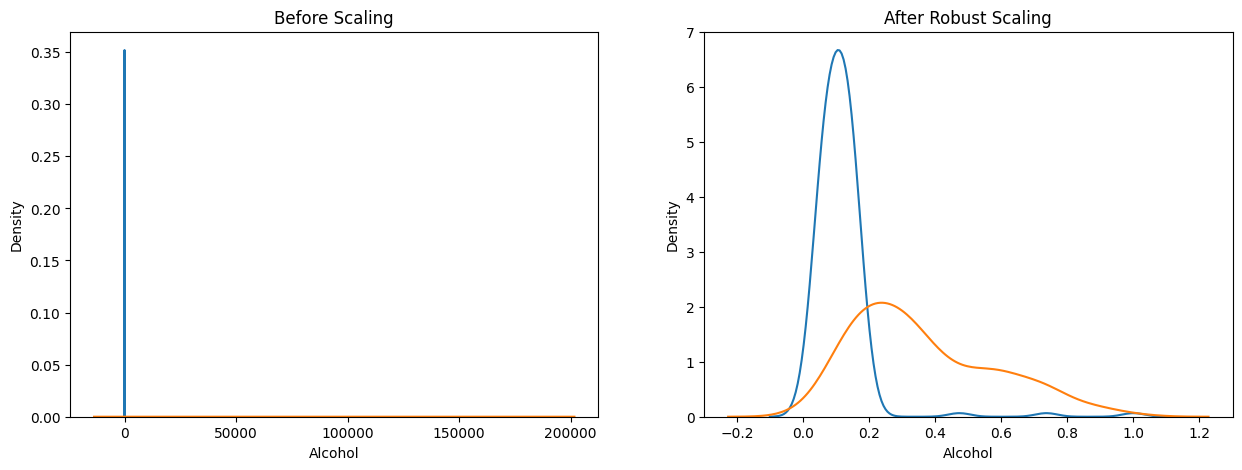

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X['Alcohol'], ax=ax1)
sns.kdeplot(X['Proline'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_scaled['Proline'], ax=ax2)
plt.show()

The "Before Scaling" plot again indicates the presence of extreme outliers or very large values in the "Alcohol" variable.
Impact of Robust Scaling:

Robust scaling effectively handles the outliers by using statistics that are less sensitive to them (median and IQR). The transformed distribution is more concentrated and balanced around the median, with less influence from the extreme values.

The transformed data on the right plot shows a more peaked and less spread distribution compared to the standard scaling approach.

In [30]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [31]:
model = LogisticRegression()
model_scaled = LogisticRegression()

In [32]:
# Fit both models
model.fit(X_train, y_train)
model_scaled.fit(X_train_scaled, y_train_scaled)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [34]:
print("Original Data",accuracy_score(y_test,y_pred))
print("Scaled Data",accuracy_score(y_test_scaled,y_pred_scaled))

Original Data 0.6756756756756757
Scaled Data 0.7567567567567568


So now we can see that the model accuracy has significantly increased after applying Robist Scaling to the data with outliers presence.

# **3. Working with categorical Data**

In [35]:
# Additional data to be added to the existing dataframe
data = {
    'smoker': [False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False],
    'drink_level': ['abstemious', 'casual drinker', 'abstemious', 'abstemious', 'social drinker', 'abstemious', 'casual drinker', 'casual drinker', 'casual drinker', 'abstemious', 'abstemious', 'abstemious', 'social drinker', 'abstemious', 'abstemious', 'social drinker', 'casual drinker', 'social drinker', 'abstemious', 'social drinker', 'casual drinker', 'abstemious', 'social drinker', 'casual drinker', 'abstemious', 'casual drinker', 'social drinker', 'social drinker'],
    'dress_preference': ['no preference', 'formal', 'no preference', None, 'informal', 'informal', 'informal', 'formal', 'formal', 'no preference', 'informal', 'informal', 'formal', 'informal', 'no preference', 'no preference', 'informal', 'formal', 'formal', 'no preference', 'no preference', 'informal', 'no preference', 'informal', 'no preference', 'no preference', 'formal', 'formal'],
    'ambience': ['family', 'family', 'friends', 'friends', 'family', 'family', 'friends', 'friends', 'friends', 'solitary', 'family', 'family', 'family', 'family', 'family', 'friends', 'solitary', 'solitary', 'family', 'friends', 'friends', 'family', 'friends', 'family', 'family', 'family', 'family', 'friends'],
    'hijos': ['independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'independent', 'kids', 'kids', 'independent', 'independent', 'kids', 'independent', 'kids', 'independent', 'independent', 'independent'],
    'activity': ['student', 'student', 'professional', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'professional', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student'],
    'budget': ['medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'low', 'low', 'low', 'low', 'medium', 'low', 'low', 'medium', 'medium', 'medium', 'low', 'low', 'medium', 'medium', 'low', 'medium', 'medium', 'medium', 'low', 'low', 'low', 'medium']
}

# Convert additional data to DataFrame
df = pd.DataFrame(data)
df.head()

,smoker,drink_level,dress_preference,ambience,hijos,activity,budget
0,False,abstemious,no preference,family,independent,student,medium
1,False,casual drinker,formal,family,independent,student,medium
2,False,abstemious,no preference,friends,independent,professional,medium
3,False,abstemious,None,friends,independent,student,medium
4,True,social drinker,informal,family,independent,student,medium


In [36]:
for col in df.columns:
    print('\n',df[col].value_counts()) 


 smoker
False    25
True      3
Name: count, dtype: int64

 drink_level
abstemious        12
casual drinker     8
social drinker     8
Name: count, dtype: int64

 dress_preference
no preference    10
informal          9
formal            8
Name: count, dtype: int64

 ambience
family      15
friends     10
solitary     3
Name: count, dtype: int64

 hijos
independent    24
kids            4
Name: count, dtype: int64

 activity
student         26
professional     2
Name: count, dtype: int64

 budget
medium    16
low       12
Name: count, dtype: int64


I have made a custom dataset that contains categorical values. Now et's encode these categorical values using differene encoding techniques in sklearn.

## **1. Ordinal Encoding**
Ordinal encoding is a preprocessing technique used for converting categorical data into numeric values that preserve their inherent ordering. It is useful when working with machine learning models like neural networks that expect numerical input features. Ordinal encoding provides two key benefits:

**A) Encoding categorical data into numeric forms that algorithms can understand.**

**B) Retaining the ordinal information between categories that is lost with one-hot encoding.**

From the above data the budget, drink_level, hijos sequenced data so we will encode them using ordinal encoding.

In [37]:
df_ordinal = df.iloc[:, [0, 1, 4, 6]]
df_ordinal

,smoker,drink_level,hijos,budget
0,False,abstemious,independent,medium
1,False,casual drinker,independent,medium
2,False,abstemious,independent,medium
3,False,abstemious,independent,medium
4,True,social drinker,independent,medium
5,False,abstemious,independent,medium
6,False,casual drinker,independent,low
7,False,casual drinker,independent,low
8,False,casual drinker,independent,low
9,False,abstemious,independent,low


So now we have separated the data that has the Ordinal categories, so now we will apply ordina lencoder in it.

In [38]:
X = df_ordinal.drop(columns = 'smoker')
y = df_ordinal['smoker']

In [39]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
X_train.shape, X_test.shape

((22, 3), (6, 3))

In [41]:
X_train

,drink_level,hijos,budget
17,social drinker,independent,low
22,social drinker,kids,medium
11,abstemious,independent,low
13,abstemious,independent,medium
15,social drinker,independent,medium
1,casual drinker,independent,medium
4,social drinker,independent,medium
5,abstemious,independent,medium
2,abstemious,independent,medium
16,casual drinker,independent,low


#### **Apply Ordinal Encoder**

In [42]:
# import OrdinalEncoder from sklearn
from sklearn.preprocessing import OrdinalEncoder

In [43]:
# Create OrdinalEncoder object
encoder = OrdinalEncoder(categories = [['abstemious', 'casual drinker', 'social drinker'], [ 'kids', 'independent'], ['low', 'medium']])

In [44]:
encoder.fit(X_train)

OrdinalEncoder(categories=[['abstemious', 'casual drinker', 'social drinker'],
                           ['kids', 'independent'], ['low', 'medium']])

In [45]:
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [46]:
X_train

array([[2., 1., 0.],
       [2., 0., 1.],
       [0., 1., 0.],
       [0., 1., 1.],
       [2., 1., 1.],
       [1., 1., 1.],
       [2., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [1., 1., 0.],
       [1., 1., 1.],
       [0., 1., 1.],
       [2., 1., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [0., 1., 1.],
       [0., 1., 1.],
       [2., 0., 1.],
       [1., 1., 0.]])

So now we can see that our ordinal data has been categorirzed to numerical form, if we want to see the categories we can use:

In [47]:
encoder.categories_

[array(['abstemious', 'casual drinker', 'social drinker'], dtype=object),
 array(['kids', 'independent'], dtype=object),
 array(['low', 'medium'], dtype=object)]

Now the next part is to encode the target variable, for that we will use the Label Encoder.

## **2. Label Encoder**
LabelEncoder is a utility in scikit-learn, a popular Python library for machine learning. It is used to encode categorical target labels into numeric form. This process is essential because many machine learning algorithms require input data to be numeric rather than categorical.

The LabelEncoder works by assigning a unique integer to each unique category (or label) in the data. For instance, if you have a column of categorical data with values like "apple," "banana," and "cherry," the LabelEncoder might encode these as 0, 1, and 2, respectively.



In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
# Create object
l_encoder = LabelEncoder()

In [50]:
# fit the data
l_encoder.fit(y_train)

LabelEncoder()

In [51]:
l_encoder.classes_

array([False,  True])

In [52]:
y_train

17    False
22     True
11    False
13    False
15     True
1     False
4      True
5     False
2     False
16    False
23    False
3     False
26    False
24    False
18    False
27    False
20    False
7     False
10    False
14    False
19    False
6     False
Name: smoker, dtype: bool

In [53]:
y_train = l_encoder.transform(y_train)
y_test = l_encoder.transform(y_test)

In [54]:
y_train

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Now we can see that our data has been encoded where False has been replaced with 0 and True has been replaced by 1.

## **3. One-Hot Encoder**

In [55]:
df_one_hot = df.iloc[:, [0, 2, 3, 5]]
df_one_hot.head()

,smoker,dress_preference,ambience,activity
0,False,no preference,family,student
1,False,formal,family,student
2,False,no preference,friends,professional
3,False,None,friends,student
4,True,informal,family,student


In [56]:
X = df_one_hot.drop(columns = 'smoker')
y = df_one_hot['smoker']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
X_train.head()

,dress_preference,ambience,activity
17,formal,solitary,student
22,no preference,friends,student
11,informal,family,student
13,informal,family,professional
15,no preference,friends,student


### **Apply One-Hot Encoder**

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
encoder = OneHotEncoder(sparse_output = False)

In [61]:
X_train_new = encoder.fit_transform(X_train)
X_test_new = encoder.transform(X_test)

In [62]:
X_train_new

array([[1., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.]])

You can also convert the above output to dataframes by using the following code:

In [63]:
categorical_columns = df_one_hot.select_dtypes(include=['object']).columns.tolist()

In [64]:
one_hot_df = pd.DataFrame(X_train_new, columns=encoder.get_feature_names_out(categorical_columns))

In [65]:
one_hot_df

,dress_preference_formal,dress_preference_informal,dress_preference_no preference,dress_preference_None,ambience_family,ambience_friends,ambience_solitary,activity_professional,activity_student
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# **4. Handling Missing Data**

## **Numerical Data**

## **1. Mean - Median Imputer**
In scikit-learn, a mean or median imputer is a technique used to fill in missing values in a dataset. The SimpleImputer class from the sklearn.impute module is often used for this purpose. It provides a simple and efficient way to replace missing values with a specified constant, the mean, median, or the most frequent value of the respective columns.

**Mean Imputer:**

Replaces missing values with the mean (average) of the column.

Useful when the data is normally distributed or when you want to maintain the mean of the dataset.

**Median Imputer:**

Replaces missing values with the median (middle value) of the column.

More robust to outliers, as the median is less sensitive to extreme values than the mean.

In [66]:
df = pd.read_csv('/kaggle/input/missing-value-data/pima-indians-diabetes data (2).csv')
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [67]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In the above data we can see that the data contain several missing values we can fill these missing values using sklearn SimpleImputer to impute the missing data.

But first we split our data in train and test spliits.

In [68]:
X = df.drop(columns = 'Class')
y = df['Class']

Now we will try both (mean and median imputers on our data and see how they effect our results)

### **Apply Simple Imputer**

In [69]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')
mean_imputer = SimpleImputer(strategy='mean')

In [70]:
median_imputer.fit(X)
mean_imputer.fit(X)


SimpleImputer()

In [71]:
median_X = median_imputer.transform(X)

mean_X = mean_imputer.transform(X)


In [72]:
median_X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

Now the missing values have been imputed, Now we can create a kde plot to see how th imputation has effected our data.

In [73]:
median_X = pd.DataFrame(median_X, columns = X.columns)
mean_X = pd.DataFrame(mean_X, columns = X.columns)


In [74]:
mean_X.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0


In [75]:
columns = ['Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin', 'BMI']

### **Visualize the Distributions**

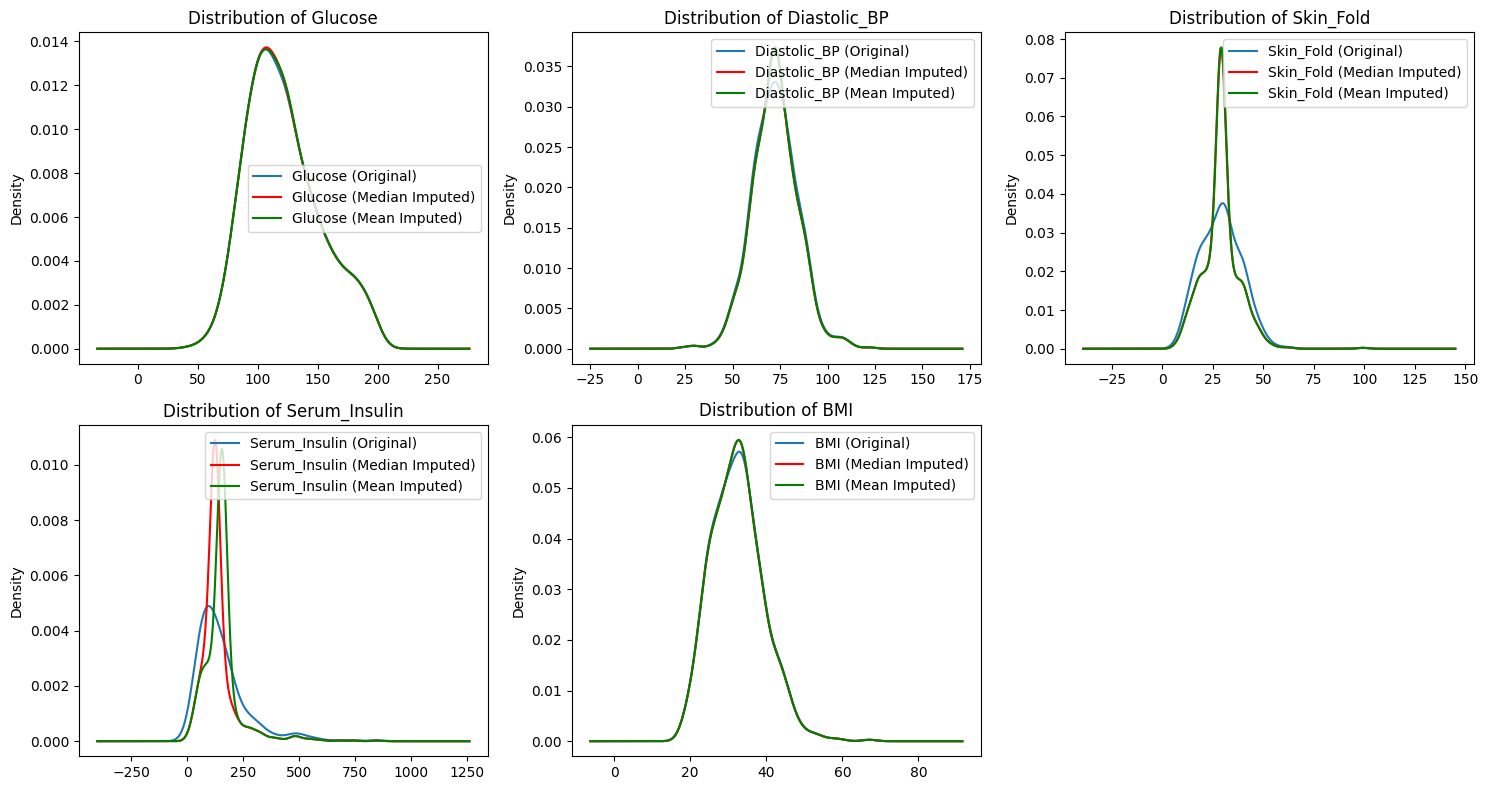

In [76]:
# Create a figure with a grid of subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Flatten the axes array for easy indexing
axs = axs.flatten()

# Plotting each column in its respective subplot
for i in range(5):
    col = columns[i]
    ax = axs[i]
    X[col].plot(kind='kde', ax=ax, label=f'{col} (Original)')
    median_X[col].plot(kind='kde', ax=ax, color='red', label=f'{col} (Median Imputed)')
    mean_X[col].plot(kind='kde', ax=ax, color='green', label=f'{col} (Mean Imputed)')
    ax.set_title(f'Distribution of {col}')
    ax.legend(loc='best')

# Remove the unused subplot
fig.delaxes(axs[-1])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


From the above plots we can see that for the columns Glucose, Diastolic_BP, Distribution of BMI the median and mean imputer both are a good choice to impute values as thed istribution has not been changed.

But for column Skin Fold and Serum Insulin the imputers has not performed well as they have changed the distribution. This may cause due to the presence of outliers or may be the distribution is not normal for these columns. 

So for these colmn we will use some other techniques.

## **2. Arbitrary Value Imputation**
Arbitrary Value Imputation is a technique used in data preprocessing to handle missing values. In this method, missing values in a dataset are replaced with a fixed arbitrary value that is usually not present in the original data. This imputation technique is simple and can be useful in certain scenarios, especially when preserving the original data distribution is not critical.

Common arbitrary values used include:

- A large negative or positive number (e.g., -9999 or 9999)
- Zero or one (depending on the context)

In [77]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [80]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In the above code if we reaplce themissing values witha relatively smaller number for example -999.

In [89]:
imputer = SimpleImputer(strategy = 'constant', fill_value = 0)

In [90]:
imputer.fit(X)

SimpleImputer(fill_value=0, strategy='constant')

In [91]:
X_imputed = imputer.transform(X)

In [92]:
X_imputed = pd.DataFrame(X_imputed, columns = X.columns)

In [93]:
columns = ['Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin', 'BMI']

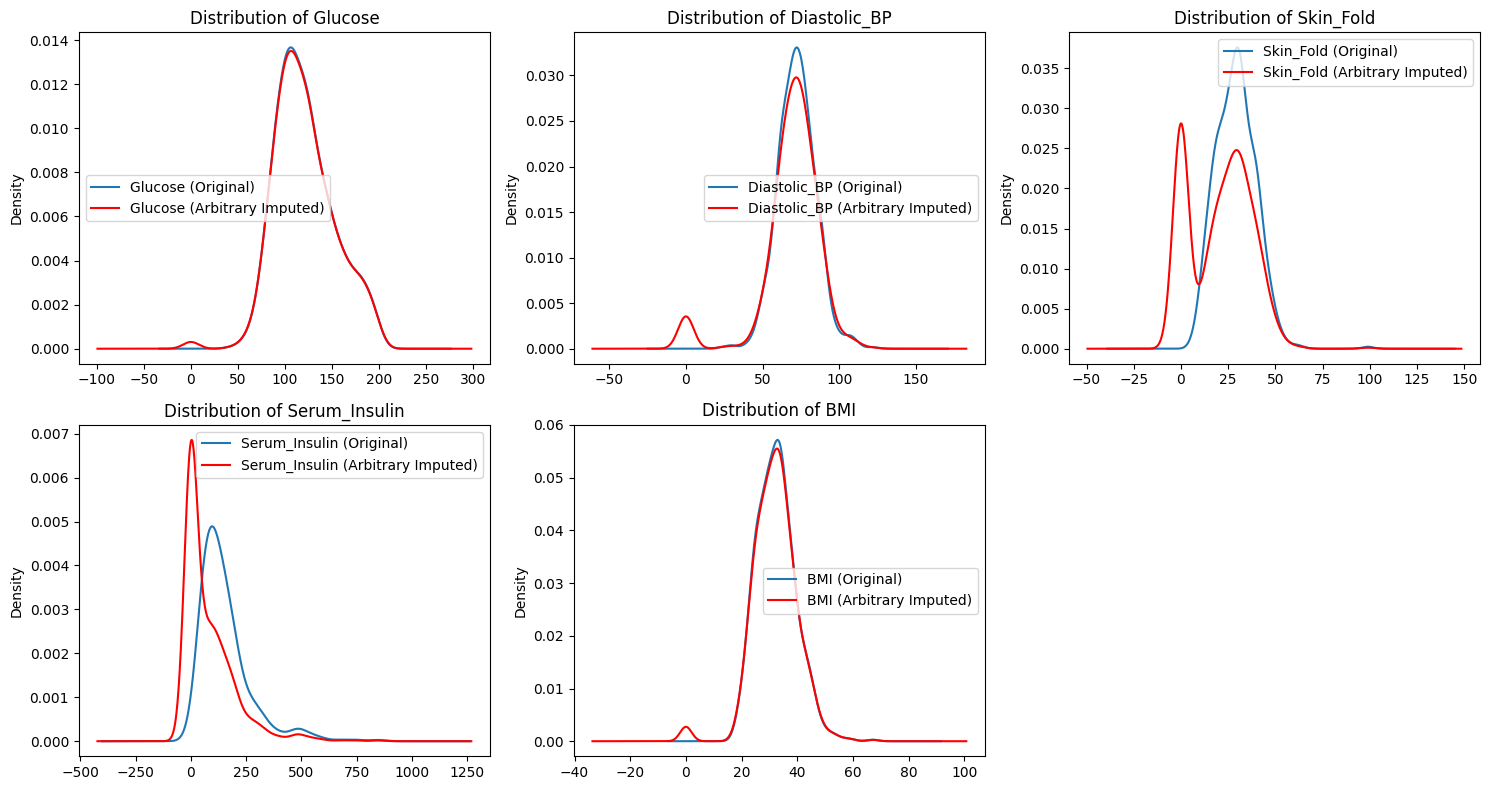

In [94]:
# Create a figure with a grid of subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Flatten the axes array for easy indexing
axs = axs.flatten()

# Plotting each column in its respective subplot
for i in range(5):
    col = columns[i]
    ax = axs[i]
    X[col].plot(kind='kde', ax=ax, label=f'{col} (Original)')
    X_imputed[col].plot(kind='kde', ax=ax, color='red', label=f'{col} (Arbitrary Imputed)')
    ax.set_title(f'Distribution of {col}')
    ax.legend(loc='best')

# Remove the unused subplot
fig.delaxes(axs[-1])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


From the above plots we can see that the Distribution of Glucose and BMI reamined unchanged that means using arbitrary imputer for these columns can be useful whiile other columns can cause problems.

## **Categorical Data - Frequent Value Imputation**
For missing values in categorical data we can use the frequent value imputation technique.

In [122]:
df = pd.read_csv('/kaggle/input/data-cleaning-feature-imputation/Students_Performance_knn.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [123]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                          25
test preparation course         0
math score                      0
reading score                   0
writing score                   0
dtype: int64

In the above output we can see that we have 25 missing values in the lunch column. Let's replace them with the help of Frequent value imputer.

In [124]:
imputer = SimpleImputer(strategy='most_frequent')

In [117]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                          25
test preparation course         0
math score                      0
reading score                   0
writing score                   0
dtype: int64

In [125]:
df_imputed = imputer.fit_transform(df)

In [131]:
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

In [133]:
df_imputed.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Now that we have learned some basic imputaion techniques, we will now study some imporatnt techniques that is KNN Imputer.

## **KNN-Imputer**
KNN Imputer is a machine learning algorithm that can help you fill in the blanks in your data. It does this by finding the most similar data points to the one with the missing value and then using the average of those values to fill in the missing value.

Some of the advantages of using KNN are:

**Enhances Data Accuracy** (tries to fill NaN with accurate values)

**Preserves Data Structure** (maintains the relationships and distribution of the data as shown in the above plot)

**Handles Numeric Data Effectively** (int/float dtypes, where it 
can make accurate estimations for missing values.)

**Integration with Scikit-Learn** (easy to integrate with data preprocessing pipeline)

We can use KNN Imputer from sklearn.impute module.

Here is a complete guide on how we can use KNN Imputer.

### **Prepare the Data**

In [144]:
df = pd.read_csv('/kaggle/input/data-cleaning-feature-imputation/Wine_Quality.csv', usecols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates', 'type'])
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates
0,white,7.0,0.27,0.36,20.7,0.045,3.00,0.45
1,white,6.3,0.30,0.34,1.6,0.049,3.30,0.49
2,white,8.1,0.28,0.40,6.9,0.050,3.26,0.44
3,white,7.2,0.23,0.32,8.5,0.058,3.19,0.40
4,white,7.2,0.23,0.32,8.5,0.058,3.19,0.40


In [145]:
df.isnull().sum()

type                 0
fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64

In [146]:
X = df.drop(columns = 'type')
y = df['type']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5197, 7), (1300, 7), (5197,), (1300,))

### **Apply KNN Imputer**
The `KNNImputer` in `scikit-learn` is used for imputing missing values in a dataset by using the k-nearest neighbors algorithm. Here’s a description of its parameters:

1. `n_neighbors`: The number of neighboring samples to use for imputation.

2. `metric`: The distance metric used for finding the nearest neighbors.

3. `add_indicator`: Whether to add a missing indicator to the output.

For now I am using a KNN imputer with 3 neighbors.

In [149]:
from sklearn.impute import KNNImputer

In [150]:
knn = KNNImputer(n_neighbors = 3, weights = 'distance')

In [151]:
X_train_knn = knn.fit_transform(X_train)
X_test_knn = knn.transform(X_test)

### **Apply Random Forest Classifier**

In [158]:
model = RandomForestClassifier()
model.fit(X_train_knn, y_train)
y_pred = model.predict(X_test_knn)
accuracy_score(y_test, y_pred)

0.9876923076923076

### **Compare with Simple Imputer**
Now let;s comapre the accuracy with a simple imputer.

In [159]:
imputer = SimpleImputer()
X_train_simple = imputer.fit_transform(X_train)
X_test_simple = imputer.transform(X_test)

In [160]:
model = LogisticRegression()
model.fit(X_train_simple, y_train)
y_pred = model.predict(X_test_simple)
accuracy_score(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9669230769230769

We can clearly see that the accuracy with KNN Imputer is better. This accuracy is more better when we have data on a larger scale of missing values.


Next up, we will study a very important concept to combine all te above steps in one step that is the "Column Transformers"

# **5. Column Transformer**

In [162]:
df = pd.read_csv('/kaggle/input/data-cleaning-feature-imputation/Students_Performance_mv.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [171]:
# Set the number of missing values to add
num_missing = 10

# Randomly select indices to set as NaN
np.random.seed(0)  # For reproducibility
missing_indices = np.random.choice(df.index, size=num_missing, replace=False)

# Add NaN values to the selected indices in the 'math score' column
df.loc[missing_indices, 'math score'] = np.nan

In [172]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                   0
writing score                   0
dtype: int64

In [169]:
df.dropna(inplace = True)

For trainig model on this data we ned several preprocessing steps:

1. Impute the missing values
2. One Hot Encoding of the categorical columns.
3. Standard Scaling of the numerical data.

We will manually perform all these steps one by one but first let's divide our data into train and test split.

In [183]:
X = df.drop(columns = ['writing score', 'parental level of education', 'test preparation course'])
y = df['writing score']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **Doing it the difficult way!**

### **Impute Missig values**

In [185]:
# adding simple imputer to fever col
imputer = KNNImputer(n_neighbors = 3, weights = 'distance')
X_train_race_math  = imputer.fit_transform(X_train[['math score']])


# also the test data
X_test_race_math  = imputer.fit_transform(X_test[['math score']])

### **Ordinal Encoding -> race, lunch**

In [189]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['group A', 'group B', 'group C', 'group D', 'group E'], ['free/reduced', 'standard']])
X_train_encode = oe.fit_transform(X_train[['race/ethnicity', 'lunch']])

# also the test data
X_test_encode = oe.fit_transform(X_test[['race/ethnicity','lunch' ]])

In [195]:
X_train_encode.shape

(767, 2)

### **One-Hot Encoding -> Gender**

In [192]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_gender = ohe.fit_transform(X_train[['gender']])

# also the test data
X_test_gender = ohe.fit_transform(X_test[['gender']])

X_train_gender.shape

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(767, 1)

### **Extract Reading Score**

In [194]:
# Extracting Age
X_train_age = X_train['reading score'].values

# also the test data
X_test_age = X_test['reading score'].values

X_train_age.shape

(767,)

### **Concatenate all the transformed data.**

In [198]:
X_train_age = X_train_age.reshape(-1, 1) 
X_test_age = X_test_age.reshape(-1, 1) 


In [199]:
X_train_transformed = np.concatenate((X_train_race_math, X_train_encode, X_train_gender, X_train_age),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_race_math, X_test_encode, X_test_gender, X_test_age),axis=1)

X_train_transformed.shape

(767, 5)

In [200]:
X_train_transformed

array([[59.,  2.,  1.,  0., 64.],
       [60.,  2.,  0.,  0., 75.],
       [99.,  4.,  1.,  1., 87.],
       ...,
       [63.,  1.,  0.,  0., 78.],
       [65.,  2.,  0.,  0., 77.],
       [70.,  1.,  1.,  0., 64.]])

Now after many steps we have successfully preprocessed our data. But we can make our lives easier with column transformers.

### **Column Transformers - Makes life easy!**

We can use column transformers to do all the above steps within a single step.

In [201]:
from sklearn.compose import ColumnTransformer

In [202]:
transformer = ColumnTransformer(transformers = [
    ('t1', KNNImputer(n_neighbors = 3, weights = 'distance'),['math score']),
    ('t2',OrdinalEncoder(categories=[['group A', 'group B', 'group C', 'group D', 'group E'], ['free/reduced', 'standard']]), ['race/ethnicity', 'lunch']),
    ('t3',OneHotEncoder(drop='first',sparse=False),['gender'])
],remainder='passthrough')

In [206]:
X_train_transfored = transformer.fit_transform(X_train).shape

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [208]:
X_train_transformed

array([[59.,  2.,  1.,  0., 64.],
       [60.,  2.,  0.,  0., 75.],
       [99.,  4.,  1.,  1., 87.],
       ...,
       [63.,  1.,  0.,  0., 78.],
       [65.,  2.,  0.,  0., 77.],
       [70.,  1.,  1.,  0., 64.]])

Now with in one step our data has been completely transformed.